In [10]:
# ---------------------------------------------
# Overview
# ---------------------------------------------

# Goal:
# - plot a best-fit line or a curve between data to predict continuous value

# Steps:
# 1. import the required library
# 2. prepare data
# 3. define Regression Class
# 4. Create Model
# 5. Define Criterion & Optimizer 
# 6. Train the data
# 7. Test the model

In [18]:
# ---------------------------------------------
# 1. import the required library
# ---------------------------------------------
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.autograd import Variable

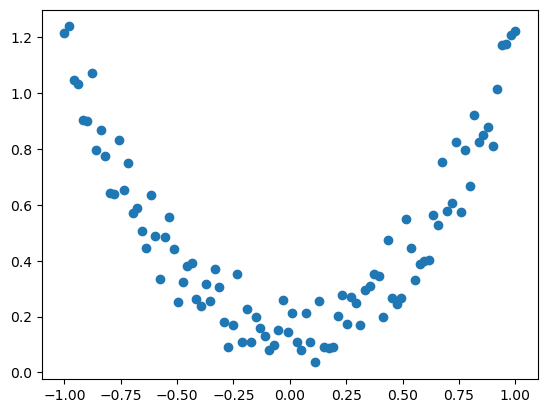

In [19]:

# ---------------------------------------------
# 2. prepare data
# ---------------------------------------------

# ref: https://pytorch.org/docs/stable/generated/torch.unsqueeze.html
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.3 * torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [20]:
# ---------------------------------------------
# 3. define Regression Class
# ---------------------------------------------

# neural network - imitates the human brains to solve complex data problems
# e.g. NLP, image recognition, speech recognition etc

# Overview:
# input layer -> multiple hidden layers -> output layer
# (1) Input Layer: data in numeric format
# (2) Hidden Layers: perform computations
# (3) Output Layer: predict the output

# inherit torch module
class NN(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # inherit __init__ function
        super(NN, self).__init__()
        # hidden layer - linear output
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # output layer - linear output
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        # we use relu (activation function)
        # to decide if a neuron is activate or not
        # if activated -> transfer to next layer (i.e. output layer)
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [21]:
# ---------------------------------------------
# 4. Create Model
# ---------------------------------------------

# construct NN model with some init values
nn = NN(n_feature=1, n_hidden=10, n_output=1)
print(nn)

NN(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [22]:
# ---------------------------------------------
# 5. Define Criterion & Optimizer 
# ---------------------------------------------

# Stochastic Gradient Descent optimizer with learning rate = 0.2
# ref: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
opt = torch.optim.SGD(nn.parameters(), lr=0.2)
# Mean Squared Error (squared L2 norm) Loss Function
# ref: https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html
# other loss functions: MAE (Mean Absolute Error), Cross-entropy etc
loss_fn = torch.nn.MSELoss()

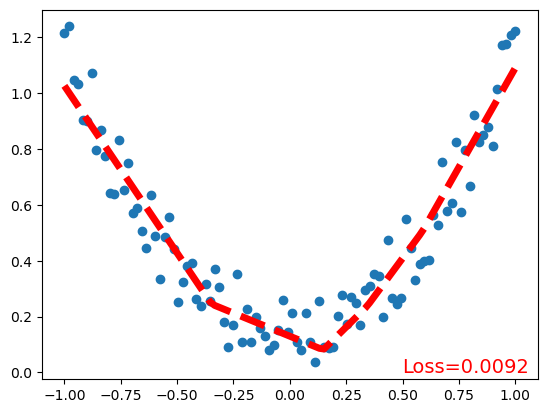

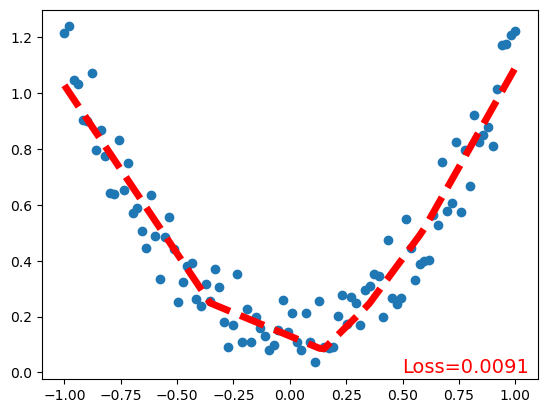

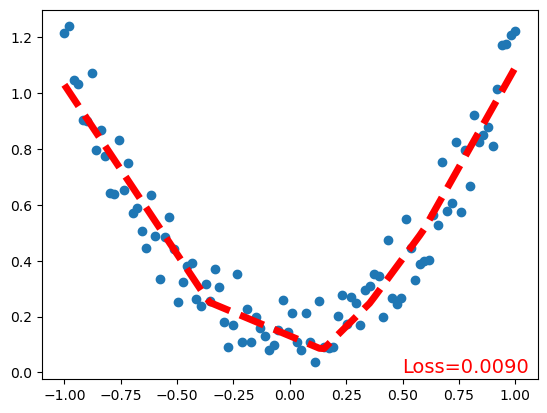

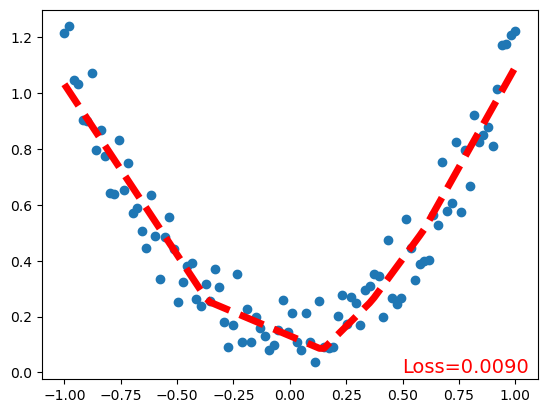

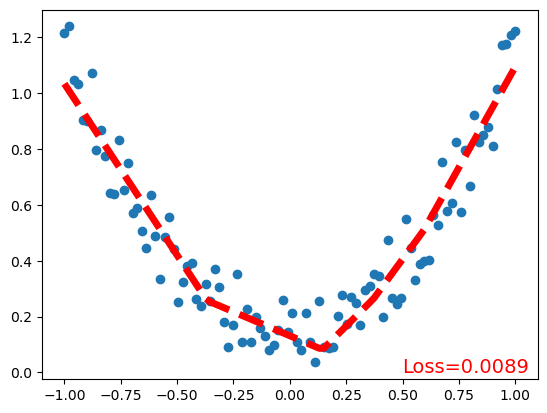

In [27]:
# ---------------------------------------------
# 6. Train the data
# ---------------------------------------------

for t in range(50):
    # forward pass
    prediction = nn(x)
    # calculate loss
    loss = loss_fn(prediction, y)
    # set gradients of all model param to zero before backpropagation (i.e. update Weights & biases)
    # because it accumulates the gradients on subsequent backward passes
    # otherwise, the gradient would be a combination of the old ones
    opt.zero_grad()
    # back propagation on the loss
    # computing the grad for all tensors in the model
    loss.backward()
    # makes the optimizer iterate overa all params (tensors) it is supposed to update
    # use their internally stored grad to update their values
    opt.step()
    
    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 14, 'color': 'red'})
        plt.pause(0.1)

In [29]:
# ---------------------------------------------
# 7. Test the model
# ---------------------------------------------

test_var = Variable(torch.Tensor([[1.0]]))
pred_y = nn(test_var)
print(pred_y.item())

1.0952014923095703
